<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/Bankruptcy-Classifier/BankruptcyClassifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1. Διαβάζει τα δεδομένα από το αρχείο excel.
from logging import exception
import pandas as pd

#Ανέβασμα αρχείου με δεδομένα
datafilelink = 'https://docs.google.com/spreadsheets/d/1xfNYsymJs0cuhcH7-Vi4hy0wB5uuujkf/export?format=xlsx'

#Επιτυχημένη λήψη του αρχείου
try :
  dataset = pd.read_excel(datafilelink)
  print('The file is properly read')
  print(dataset.head())

except FileNotFoundError:
 print('The file was not found, try chainging the name')

except Exception as e:
 print(" Some other error occured",{e})



The file is properly read
   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0              1014.128862                    0.011751   
1               561.974631                    0.099662   
2               826.919025                    0.009594   
3               493.176956                    0.196284   
4               100.421465                    0.179038   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.038505                                        0.965479   
1                 0.015775                                        1.415467   
2                 0.093562                                        1.575034   
3                 0.000581                                        1.346780   
4                 0.000173                                        3.299687   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0           567.866550             0.532258                     545.195964   


In [ ]:
print("Types of data \n")
print(dataset.info())

In [ ]:
print("Description of the data \n")
print(dataset.describe())  # Στατιστικά περιγραφικά στοιχεία

In [3]:
# Ομαδοποίηση δεδομένων ανά έτος και κατάσταση (1 = υγιής, 2 = χρεοκοπημένη)
grouped_data = dataset.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().unstack()

# Αντικατάσταση των NaN με 0, αν υπάρχουν
grouped_data = grouped_data.fillna(0)

# Προεπισκόπηση των δεδομένων
print(grouped_data)


ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)     1   2
ΕΤΟΣ                                   
2006                           2748  52
2007                           2846  53
2008                           2731  99
2009                           2143  44


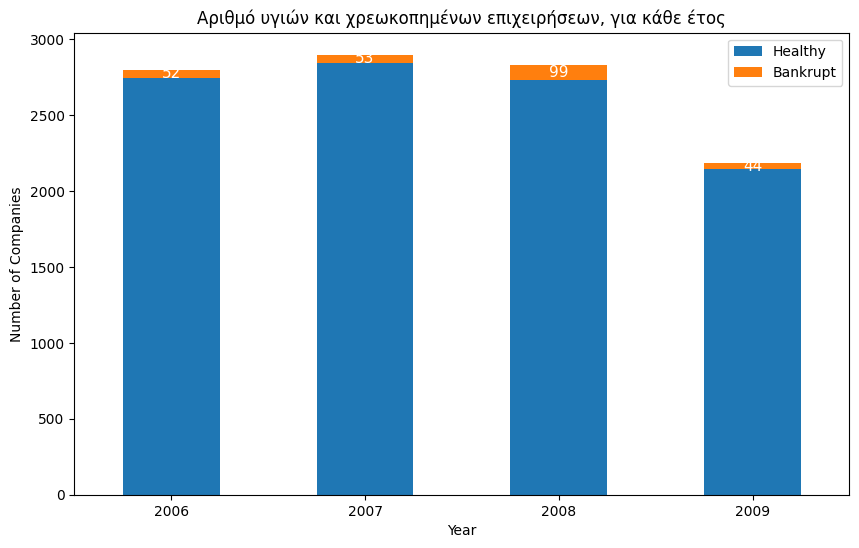

In [4]:
# 2.a) Tυπώνει, σε γραφήματα τον αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος
import matplotlib.pyplot as plt

# # Δημιουργία stacked bar plot
# grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# # Προσθήκη τίτλου και ετικετών
# plt.title('Stacked Bar Plot of Companies per Year')
# plt.xlabel('Year')
# plt.ylabel('Total Number of Companies')
# plt.legend(['Healthy', 'Bankrupt'])
# plt.xticks(rotation=45)

# # Εμφάνιση του γραφήματος
# plt.show()


# Δημιουργία stacked bar plot για τον Αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Προσθήκη ετικετών για τις bankrupt επιχειρήσεις (πάνω από το σωστό σημείο κάθε μπάρας)
for i, (healthy, bankrupt) in enumerate(zip(grouped_data[1], grouped_data[2])):
    # Ετικέτα για bankrupt (πάνω από το stacked μέρος)
    ax.text(i, healthy + bankrupt / 2, str(int(bankrupt)), ha='center', va='center', color='white', fontsize=11)

# Προσθήκη τίτλου και ετικετών αξόνων
plt.title('Αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.legend(['Healthy', 'Bankrupt'])
plt.xticks(rotation=360)

# Εμφάνιση του γραφήματος
plt.show()


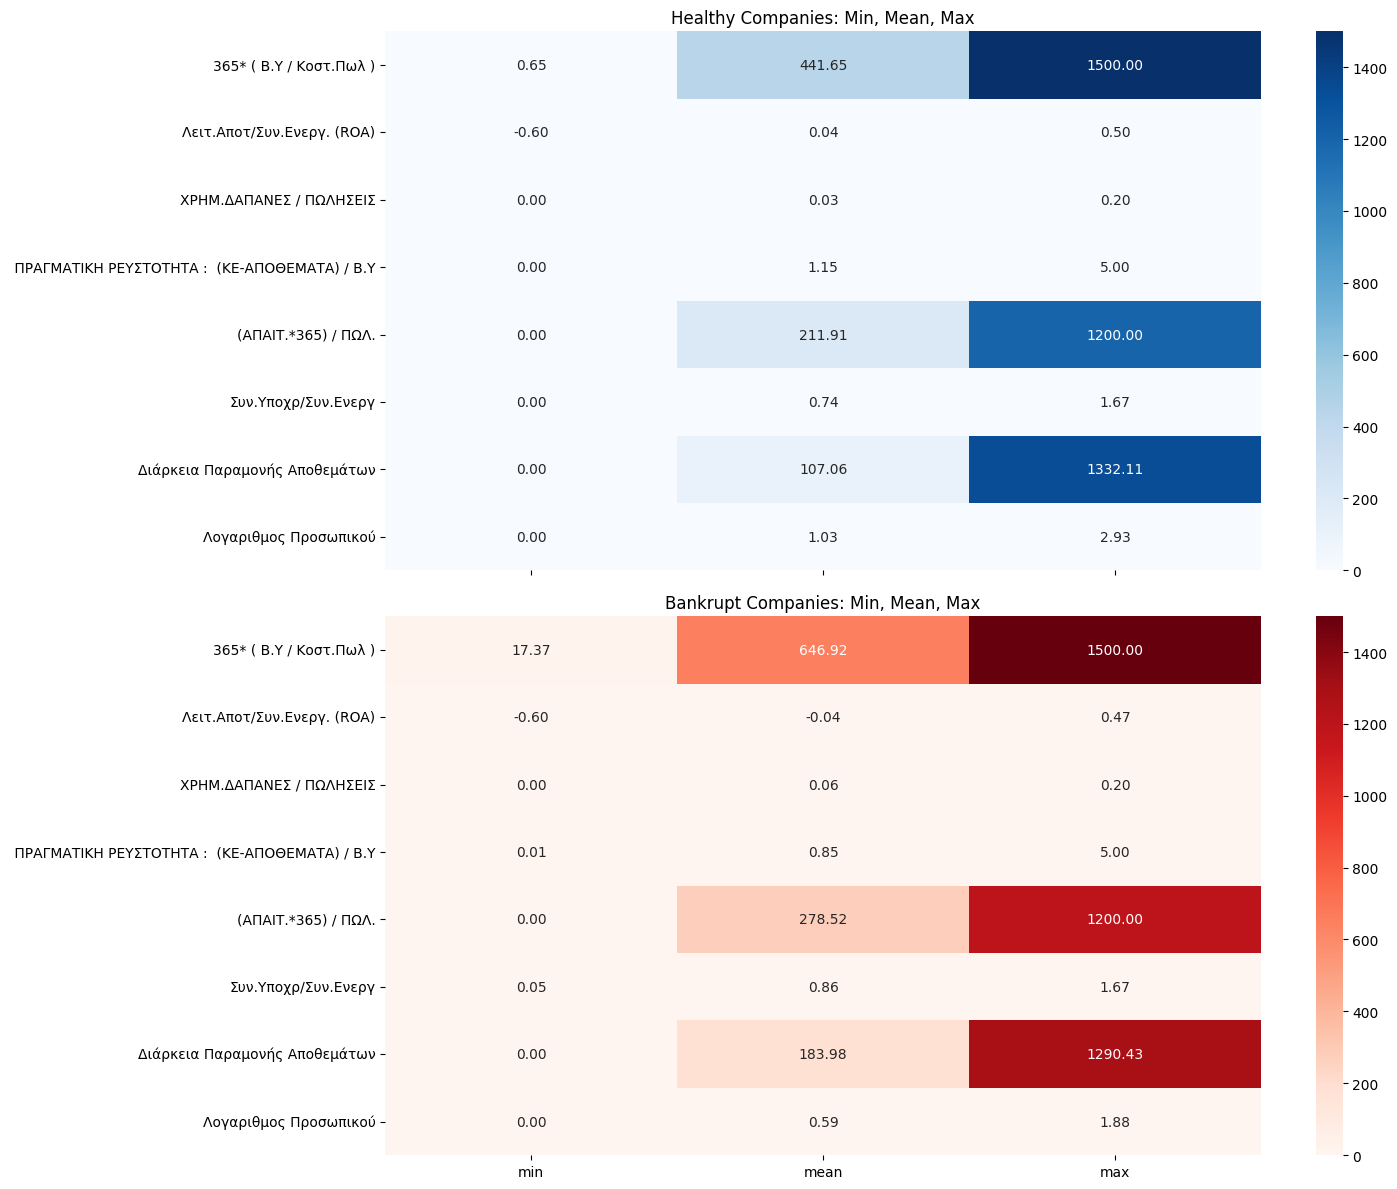

In [5]:

# 2.b) Tυπώνει, σε γραφήματα τα min, max, average τιμή για κάθε δείκτη

import seaborn as sns


# Διαχωρισμός των δεδομένων
healthy = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
bankrupt = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# Λίστα με στήλες για ανάλυση
columns_to_analyze = [
    '365* ( Β.Υ / Κοστ.Πωλ )',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
    'Συν.Υποχρ/Συν.Ενεργ',
    'Διάρκεια Παραμονής Αποθεμάτων',
    'Λογαριθμος Προσωπικού'
]

# Dictionary για συντομευμένα labels
short_labels = {
    '365* ( Β.Υ / Κοστ.Πωλ )': 'Inventory Turnover',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'ROA',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'Fin Exp/Sales',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Real Liquidity',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'Receiv Turn',
    'Συν.Υποχρ/Συν.Ενεργ': 'Liab/Assets',
    'Διάρκεια Παραμονής Αποθεμάτων': 'Inv Days',
    'Λογαριθμος Προσωπικού': 'Log Employees'
}

# Υπολογισμός στατιστικών
healthy_stats = healthy[columns_to_analyze].describe().loc[['min', 'mean','max']]
bankrupt_stats = bankrupt[columns_to_analyze].describe().loc[['min', 'mean','max']]

# Μετονομασία των σειρών
healthy_stats = healthy_stats.rename(index=short_labels)
bankrupt_stats = bankrupt_stats.rename(index=short_labels)

# Δημιουργία του subplot
fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Υγιείς εταιρείες heatmap
sns.heatmap(healthy_stats.T, annot=True, fmt=".2f", cmap='Blues', ax=axs[0])
axs[0].set_title('Healthy Companies: Min, Mean, Max')
axs[0].tick_params(axis='x')

# Πτωχευμένες εταιρείες heatmap
sns.heatmap(bankrupt_stats.T, annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
axs[1].set_title('Bankrupt Companies: Min, Mean, Max')
axs[1].tick_params(axis='x')

plt.tight_layout()
plt.show()


In [ ]:
#Εναλλακτηκό figure 2
# from sklearn.preprocessing import StandardScaler
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Διαχωρισμός των δεδομένων
# healthy = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
# bankrupt = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# # Λίστα με στήλες για ανάλυση
# columns_to_analyze = [
#     '365* ( Β.Υ / Κοστ.Πωλ )',
#     'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
#     'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
#     ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
#     '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
#     'Συν.Υποχρ/Συν.Ενεργ',
#     'Διάρκεια Παραμονής Αποθεμάτων',
#     'Λογαριθμος Προσωπικού'
# ]

# # Τυποποίηση (Z-Score) για υγιείς εταιρείες
# scaler = StandardScaler()
# healthy_standardized = pd.DataFrame(
#     scaler.fit_transform(healthy[columns_to_analyze]),
#     columns=columns_to_analyze
# )

# # Τυποποίηση (Z-Score) για πτωχευμένες εταιρείες
# bankrupt_standardized = pd.DataFrame(
#     scaler.fit_transform(bankrupt[columns_to_analyze]),
#     columns=columns_to_analyze
# )

# # Dictionary για συντομευμένα labels
# short_labels = {
#     '365* ( Β.Υ / Κοστ.Πωλ )': 'Inventory Turnover',
#     'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'ROA',
#     'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'Fin Exp/Sales',
#     ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Real Liquidity',
#     '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'Receiv Turn',
#     'Συν.Υποχρ/Συν.Ενεργ': 'Liab/Assets',
#     'Διάρκεια Παραμονής Αποθεμάτων': 'Inv Days',
#     'Λογαριθμος Προσωπικού': 'Log Employees'
# }

# # Υπολογισμός στατιστικών
# healthy_stats = healthy_standardized.describe().loc[['min', 'mean', 'max']]
# bankrupt_stats = bankrupt_standardized.describe().loc[['min', 'mean', 'max']]

# # Μετονομασία των σειρών
# healthy_stats = healthy_stats.rename(index=short_labels)
# bankrupt_stats = bankrupt_stats.rename(index=short_labels)

# # Δημιουργία του subplot
# fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# # Υγιείς εταιρείες heatmap
# sns.heatmap(healthy_stats.T, annot=True, fmt=".2f", cmap='Blues', ax=axs[0])
# axs[0].set_title('Healthy Companies: Min, Mean, Max (Normalized)')
# axs[0].tick_params(axis='x')

# # Πτωχευμένες εταιρείες heatmap
# sns.heatmap(bankrupt_stats.T, annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
# axs[1].set_title('Bankrupt Companies: Min, Mean, Max (Normalized)')
# axs[1].tick_params(axis='x')

# plt.tight_layout()
# plt.show()


In [6]:
# 3. Έλεγχος για τυχόν ελλιπείς εγγραφές
if dataset.isnull().values.any():
    print("Υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.")
    print(dataset.isnull().sum())  # Εμφάνιση του αριθμού των NaN ανά στήλη
else:
    print("Δεν υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.")

Δεν υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.


In [3]:
# 4. Κανονικοποίηση δεδομένων στο διάστημα [0,1]
#Κανονικοποίηση μόνο των τιμών που δεν είναι εξάρχησ στο διάστημα αυτό και εκτός το δείκτη Ενδειξη Ασυνέπειας

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    '365* ( Β.Υ / Κοστ.Πωλ )',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
    'Συν.Υποχρ/Συν.Ενεργ',
    'Διάρκεια Παραμονής Αποθεμάτων',
    'Λογαριθμος Προσωπικού',
    'ΕΤΟΣ'
]

# Δημιουργία του MinMaxScaler
scaler = MinMaxScaler()

# Εφαρμογή κανονικοποίησης
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

print("Τα δεδομένα έχουν κανονικοποιηθεί στο διάστημα [0,1].")
print(dataset.describe())

Τα δεδομένα έχουν κανονικοποιηθεί στο διάστημα [0,1].
       365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
count             10716.000000                10716.000000   
mean                  0.297293                    0.579531   
std                   0.257869                    0.115030   
min                   0.000000                    0.000000   
25%                   0.115054                    0.549574   
50%                   0.216568                    0.571106   
75%                   0.380265                    0.618654   
max                   1.000000                    1.000000   

       ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ  \
count             10716.000000   
mean                  0.144647   
std                   0.190035   
min                   0.000000   
25%                   0.010050   
50%                   0.075716   
75%                   0.207091   
max                   1.000000   

        ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  (ΑΠΑΙΤ.*365) / ΠΩΛ.  \
co

In [4]:
# 5.Kάνει χρήση του Stratified kfold ώστε να δημιουργεί 4 folds
from sklearn.model_selection import StratifiedKFold

# Δημιουργία του Stratified K-Fold αντικειμένου
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Στόχοι (target variable)
X = dataset.drop(columns=['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'])  # Όλα τα χαρακτηριστικά εκτόσ label
y = dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']  # Ετικέτες (1: Υγιής, 2: Χρεοκοπημένη)

# Δημιουργία των folds
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"Fold {fold}:")
    print(f"Train Indices: {train_index[:10]}... Total: {len(train_index)}")  # Εμφάνιση των πρώτων 10 δεικτών
    print(f"Test Indices: {test_index[:10]}... Total: {len(test_index)}")

    # Διαχωρισμός δεδομένων
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train Labels Distribution: \n{y_train.value_counts(normalize=True)}")
    print(f"Test Labels Distribution: \n{y_test.value_counts(normalize=True)}")

    fold += 1


Fold 1:
Train Indices: [ 0  1  3  4  5  6  8  9 10 11]... Total: 8037
Test Indices: [ 2  7 13 21 25 36 37 40 41 43]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Fold 2:
Train Indices: [ 0  1  2  3  5  6  7  8 10 11]... Total: 8037
Test Indices: [ 4  9 14 15 16 20 32 33 35 39]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Fold 3:
Train Indices: [ 2  4  5  7  8  9 12 13 14 15]... Total: 8037
Test Indices: [ 0  1  3  6 10 11 18 22 27 29]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Di

In [9]:
#6.a πόσες χρεωκοπημένες και πόσες υγιείς εταιρείες υπάρχουν στο training set
#6.b Και πόσες στο test set

fold = 1

for train_i, test_i in skf.split(X,y) :

   y_train, y_test = y.iloc[train_i], y.iloc[test_i]

   count_b_in_train = (y_train == 2).sum()
   count_not_b_in_train = (y_train == 1).sum()

   count_b_in_test = (y_test == 2).sum()
   count_not_b_in_test = (y_test == 1).sum()

   print(f"Fold {fold}:")
   print(f"Train Set: {count_b_in_train} bankrupt companies, {count_not_b_in_train} NOT bankrupt companies")
   print(f"Test Set: {count_b_in_test} bankrupt companies, {count_not_b_in_test} NOT bankrupt companies\n")

   fold+=1







Fold 1:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 2:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 3:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 4:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies



In [5]:
#7 Μετατροπή της κατανομής σε 3 υγιείς / 1 χρεωκοπημένη στο training set


from sklearn.utils import resample

fold = 1

for train_i, test_i in skf.split(X, y):
    # Διαχωρισμός του training set
    X_train, y_train = X.iloc[train_i], y.iloc[train_i]
    X_test, y_test = X.iloc[test_i], y.iloc[test_i]

    # Χωρισμός των training δεδομένων σε υγιείς (class 1) και χρεοκοπημένες (class 2)
    X_train_healthy = X_train[y_train == 1]
    X_train_bankrupt = X_train[y_train == 2]

    # Ανάλογοι αριθμοί υγιών και χρεοκοπημένων στο training set
    num_healthy = len(X_train_healthy)
    num_bankrupt = len(X_train_bankrupt)

    # Έλεγχος αν η αναλογία είναι μεγαλύτερη από 3:1
    if num_healthy > 3 * num_bankrupt:
        # Τυχαία επιλογή 3x των χρεοκοπημένων εταιρειών
        X_train_healthy_resampled = resample(X_train_healthy,
                                             replace=False,
                                             n_samples=3 * num_bankrupt,
                                             random_state=42)
        # Ενοποίηση των δεδομένων
        X_train_resampled = pd.concat([X_train_healthy_resampled, X_train_bankrupt])
        y_train_resampled = pd.concat([
            pd.Series([1] * len(X_train_healthy_resampled)),
            pd.Series([2] * len(X_train_bankrupt))
        ])
    else:
        # Δεν χρειάζεται παρέμβαση
        X_train_resampled = X_train
        y_train_resampled = y_train

    # Εκτύπωση αναλογιών
    print(f"Fold {fold}:")
    print(f"Train Set: {len(y_train_resampled[y_train_resampled == 1])} healthy companies, "
          f"{len(y_train_resampled[y_train_resampled == 2])} bankrupt companies")
    print(f"Test Set: {len(y_test[y_test == 1])} healthy companies, {len(y_test[y_test == 2])} bankrupt companies\n")

    fold += 1


Fold 1:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 2:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 3:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 4:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies



In [6]:
#Εισαγωγή απαραίτητων στοιχίων για κάθε μοντέλο

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



In [14]:
#Δημιουργία του χώρου για την αποθήκευση των αρχείων στο drive

#create a folder to store results
import os
# Specify the Drive Path
drive_path = '/content/drive/My Drive/ExperimentalResults/BreastCancerClass'

# Check if the folder exists, and create it if necessary
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

# Check if the folder exists, and create it if necessary
figure_path = os.path.join(drive_path, 'Figures')  # You can change 'Figures' to your desired folder name
if not os.path.exists(figure_path):
    os.makedirs(figure_path)

In [7]:
# Βοηθητική συναρτηση ν1 "Υπολογισμός Μετρικών"
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

def calculate_metrics(y_true, y_pred, y_proba=None):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    metrics = {
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "Accuracy": round(accuracy_score(y_true, y_pred), 2),
        "Precision": round(precision_score(y_true, y_pred, zero_division=0), 2),
        "Recall": round(recall_score(y_true, y_pred, zero_division=0), 2),
        "F1 Score": round(f1_score(y_true, y_pred), 2),
        "ROC-AUC": round(roc_auc_score(y_true, y_proba), 2) if y_proba is not None else None
    }
    return metrics


In [8]:
# Βοηθητική  για Confusion Matrix με πιο ωραία plots

def funcy_cf_plot(cf_matrix, class_names, fullMatrixName, directoryToSave):
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted company status')
    ax.set_ylabel('Actual company status')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

    figure_path = os.path.join(directoryToSave, fullMatrixName + ".png")
    plt.savefig(figure_path)
    plt.show()



Currently in fold 1...
. Working with classifier SVM...
. Finished training in 2.5397 seconds.
Train Metrics for SVM (Fold 1):
TP: 0
TN: 7851
FP: 0
FN: 186
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.93
Test Metrics for SVM (Fold 1):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.74


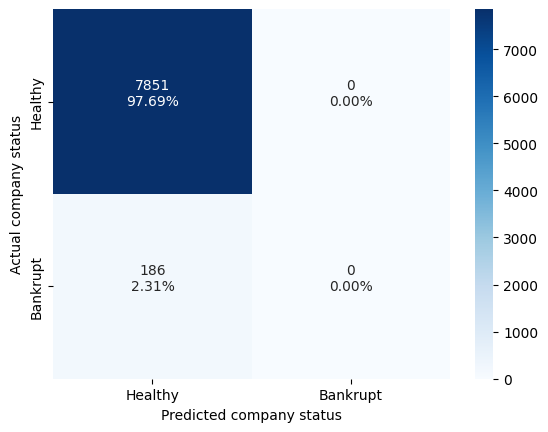

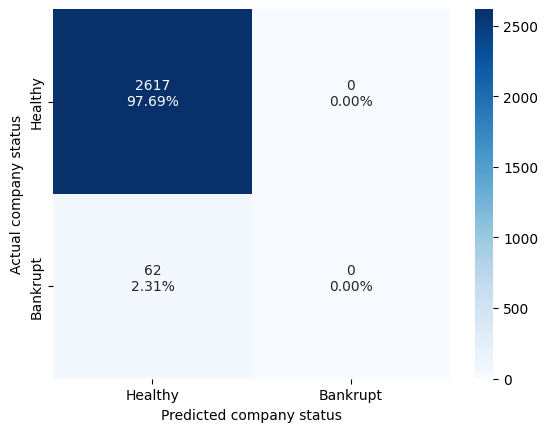

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier Ctree...
. Finished training in 0.0870 seconds.
Train Metrics for Ctree (Fold 1):
TP: 186
TN: 7851
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for Ctree (Fold 1):
TP: 8
TN: 2558
FP: 59
FN: 54
Accuracy: 0.96
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC-AUC: 0.55


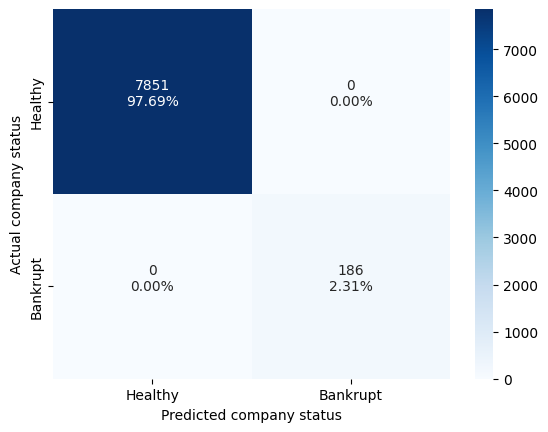

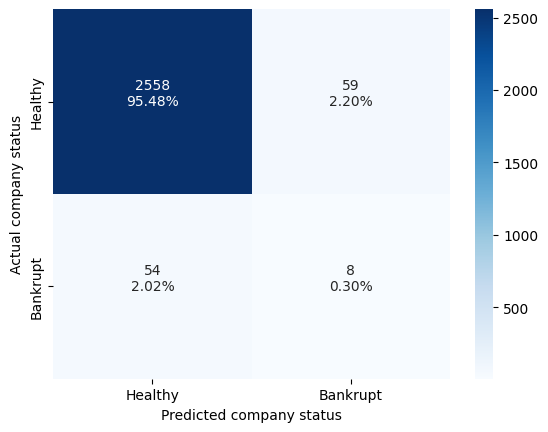

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier LDA...
. Finished training in 0.0122 seconds.
Train Metrics for LDA (Fold 1):
TP: 16
TN: 7759
FP: 92
FN: 170
Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.84
Test Metrics for LDA (Fold 1):
TP: 1
TN: 2589
FP: 28
FN: 61
Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.82


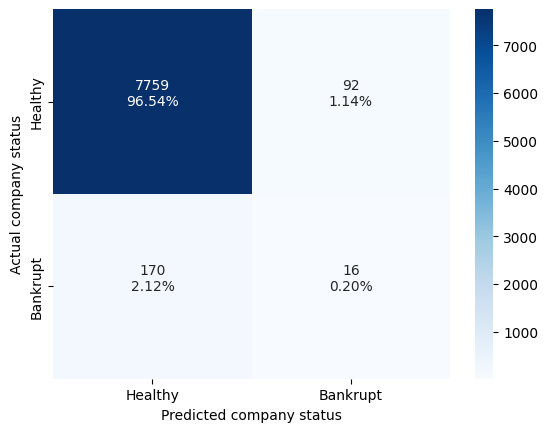

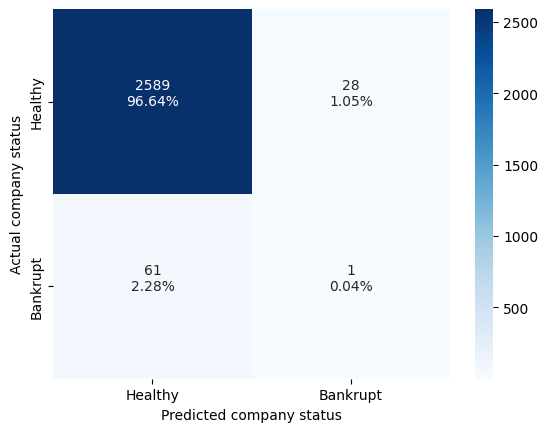

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier LR...
. Finished training in 0.0391 seconds.
Train Metrics for LR (Fold 1):
TP: 1
TN: 7851
FP: 0
FN: 185
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.84
Test Metrics for LR (Fold 1):
TP: 0
TN: 2616
FP: 1
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.84


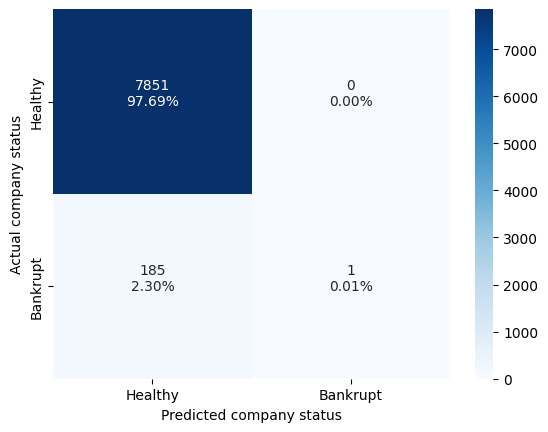

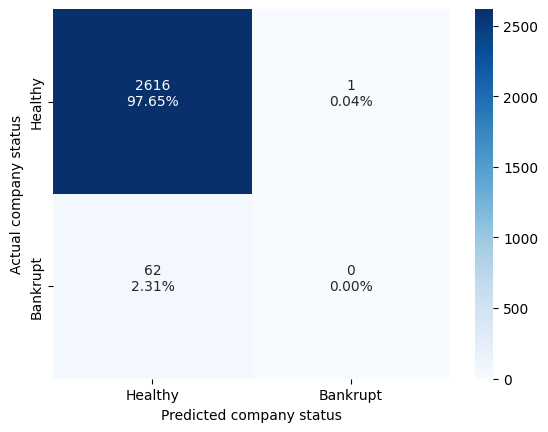

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier RF...
. Finished training in 2.0556 seconds.
Train Metrics for RF (Fold 1):
TP: 186
TN: 7851
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for RF (Fold 1):
TP: 1
TN: 2616
FP: 1
FN: 61
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.85


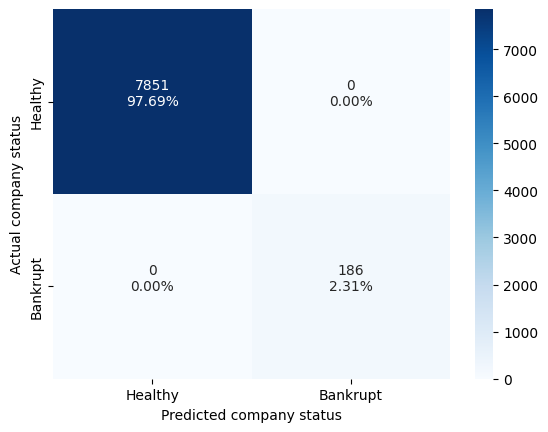

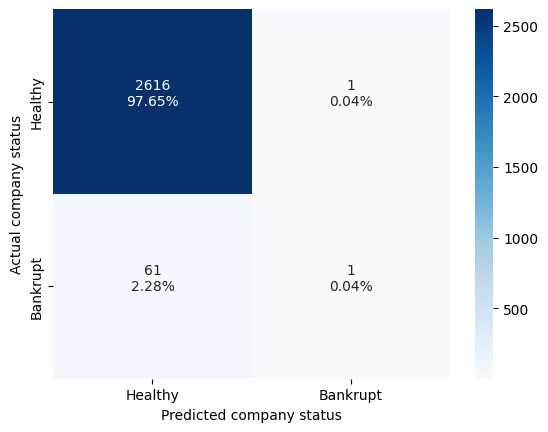

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier GB...
. Finished training in 3.1623 seconds.
Train Metrics for GB (Fold 1):
TP: 49
TN: 7850
FP: 1
FN: 137
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.96
Test Metrics for GB (Fold 1):
TP: 1
TN: 2612
FP: 5
FN: 61
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.84


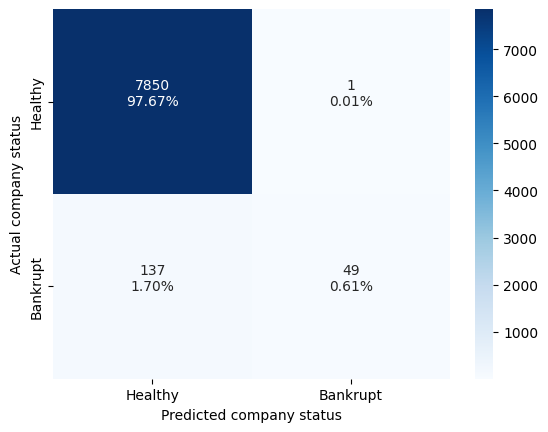

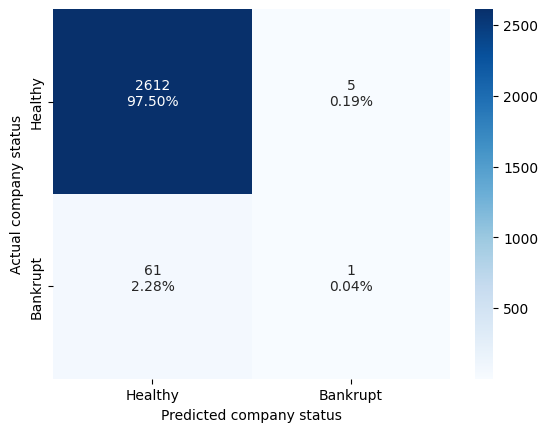

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier kNN...
. Finished training in 0.0193 seconds.
Train Metrics for kNN (Fold 1):
TP: 15
TN: 7846
FP: 5
FN: 171
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.97
Test Metrics for kNN (Fold 1):
TP: 4
TN: 2613
FP: 4
FN: 58
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.68


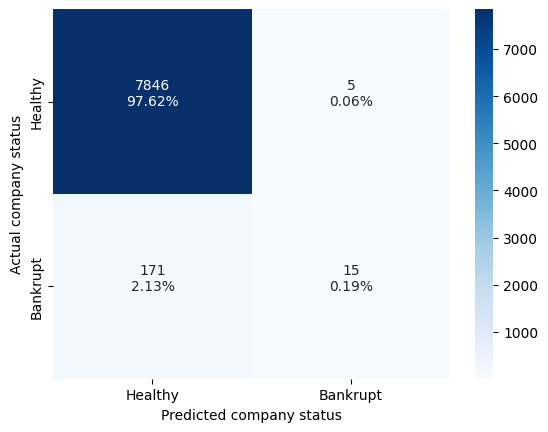

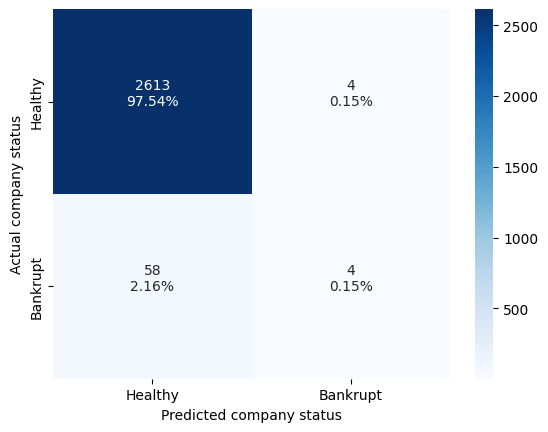

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier NB...
. Finished training in 0.0064 seconds.
Train Metrics for NB (Fold 1):
TP: 43
TN: 7413
FP: 438
FN: 143
Accuracy: 0.93
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
ROC-AUC: 0.83
Test Metrics for NB (Fold 1):
TP: 12
TN: 2489
FP: 128
FN: 50
Accuracy: 0.93
Precision: 0.98
Recall: 0.95
F1 Score: 0.97
ROC-AUC: 0.83


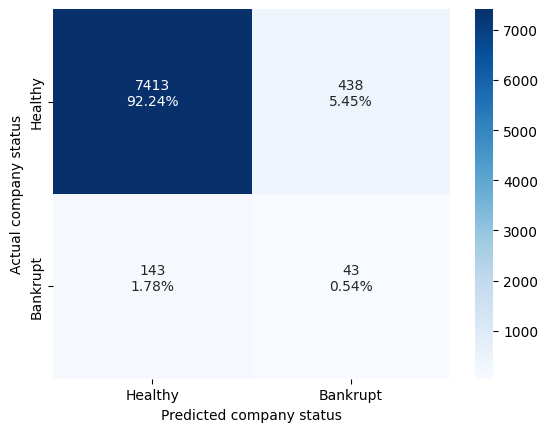

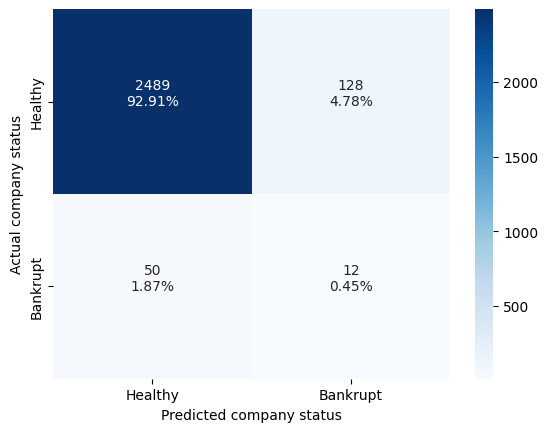

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


. Finished training in 10.5913 seconds.
Train Metrics for MLP (Fold 1):
TP: 8
TN: 7849
FP: 2
FN: 178
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.91
Test Metrics for MLP (Fold 1):
TP: 1
TN: 2615
FP: 2
FN: 61
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.85


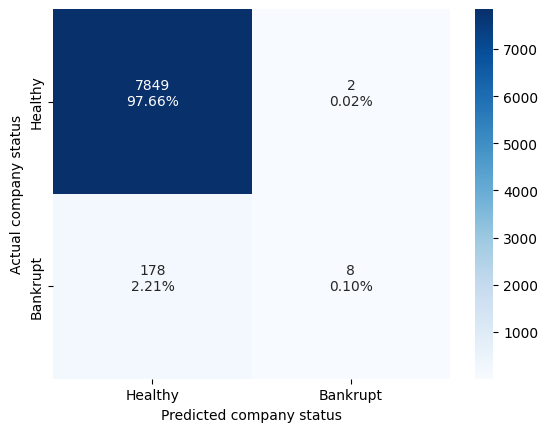

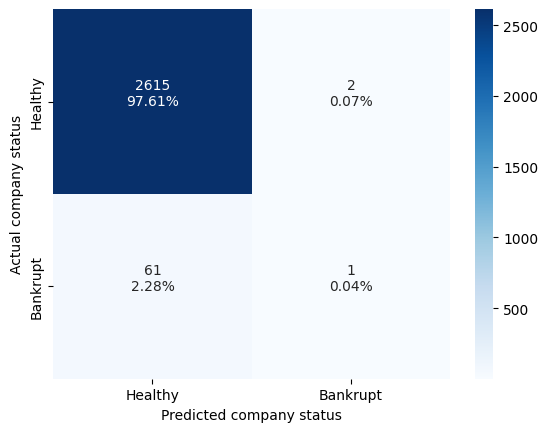

. Finished saving confusion matrices.
. Finished appending results to csv_data.
Currently in fold 2...
. Working with classifier SVM...
. Finished training in 2.6574 seconds.
Train Metrics for SVM (Fold 2):
TP: 0
TN: 7851
FP: 0
FN: 186
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.92
Test Metrics for SVM (Fold 2):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.71


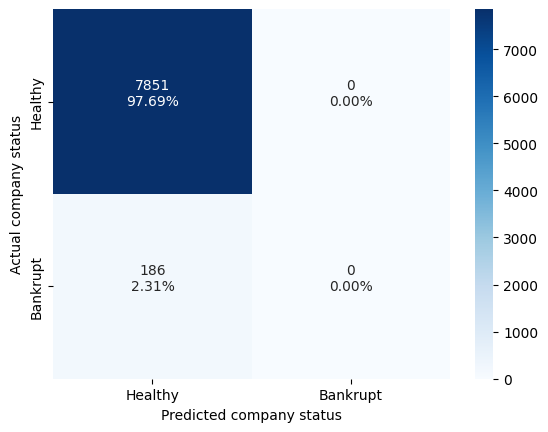

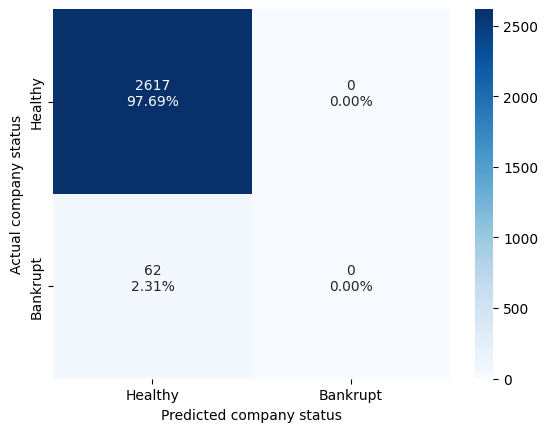

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier Ctree...
. Finished training in 0.1295 seconds.
Train Metrics for Ctree (Fold 2):
TP: 186
TN: 7851
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for Ctree (Fold 2):
TP: 11
TN: 2559
FP: 58
FN: 51
Accuracy: 0.96
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC-AUC: 0.58


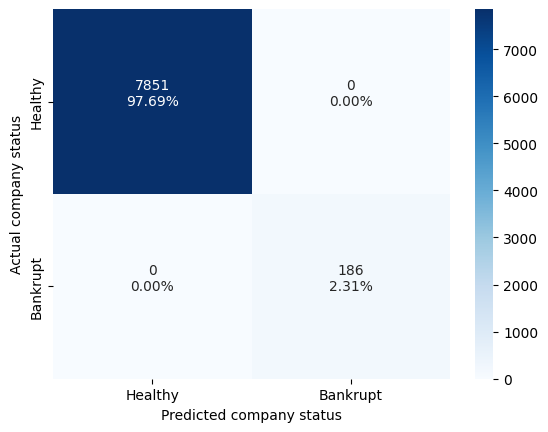

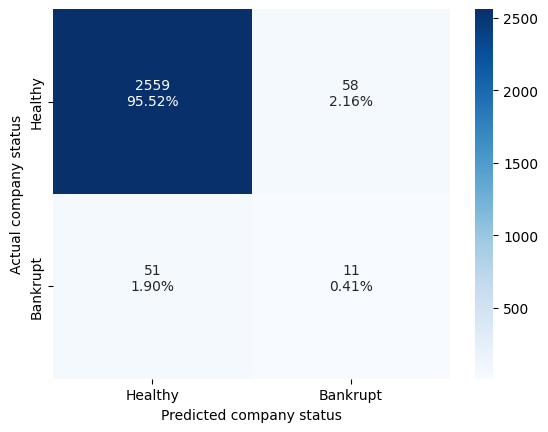

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier LDA...
. Finished training in 0.1156 seconds.
Train Metrics for LDA (Fold 2):
TP: 5
TN: 7792
FP: 59
FN: 181
Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.83
Test Metrics for LDA (Fold 2):
TP: 3
TN: 2592
FP: 25
FN: 59
Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.88


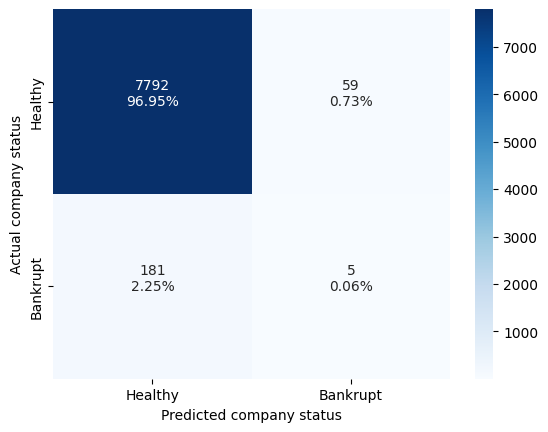

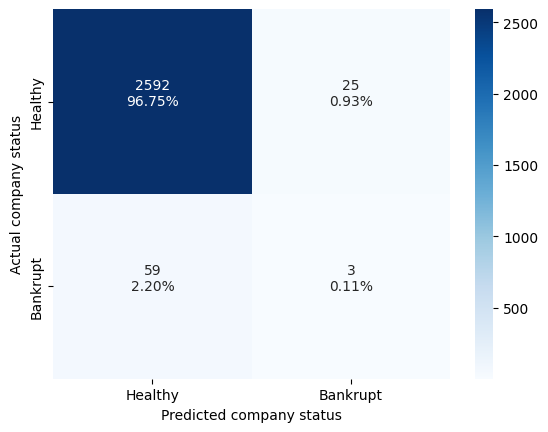

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier LR...
. Finished training in 0.0402 seconds.
Train Metrics for LR (Fold 2):
TP: 0
TN: 7851
FP: 0
FN: 186
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.83
Test Metrics for LR (Fold 2):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.86


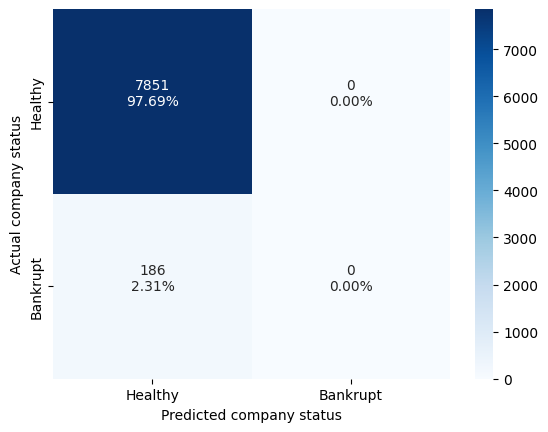

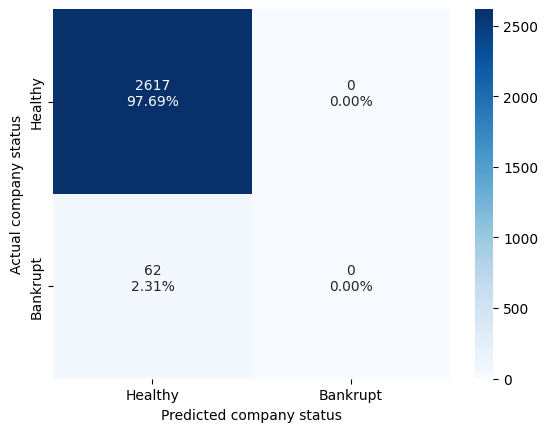

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier RF...
. Finished training in 1.7715 seconds.
Train Metrics for RF (Fold 2):
TP: 186
TN: 7851
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for RF (Fold 2):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.89


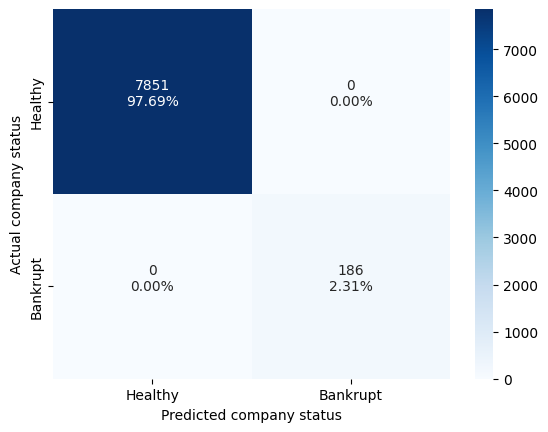

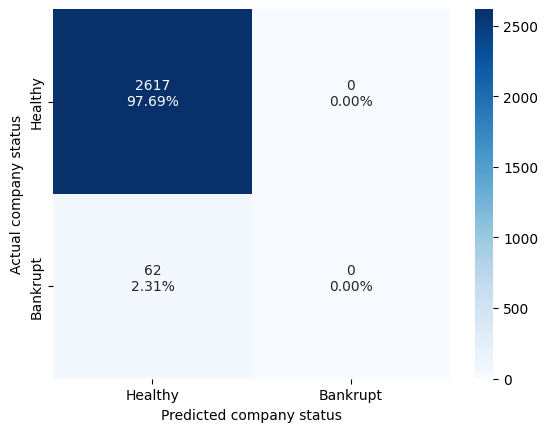

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier GB...
. Finished training in 3.1504 seconds.
Train Metrics for GB (Fold 2):
TP: 61
TN: 7851
FP: 0
FN: 125
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.96
Test Metrics for GB (Fold 2):
TP: 3
TN: 2609
FP: 8
FN: 59
Accuracy: 0.97
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.89


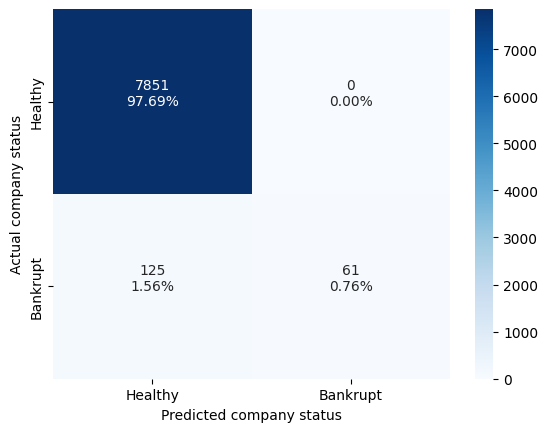

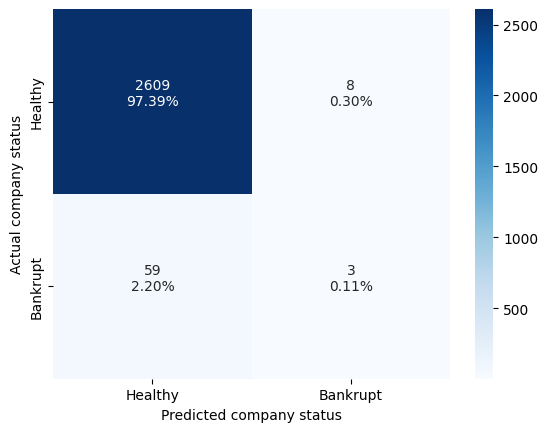

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier kNN...
. Finished training in 0.0250 seconds.
Train Metrics for kNN (Fold 2):
TP: 15
TN: 7843
FP: 8
FN: 171
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.97
Test Metrics for kNN (Fold 2):
TP: 1
TN: 2617
FP: 0
FN: 61
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.67


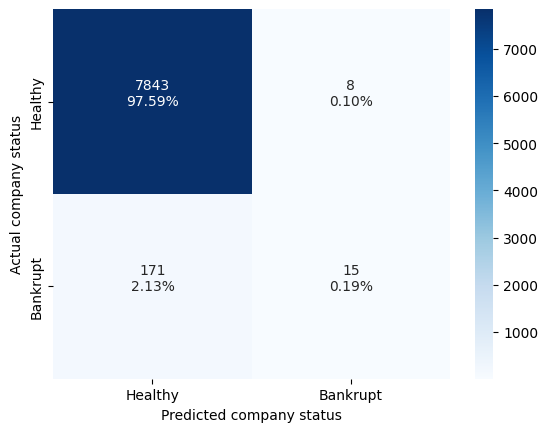

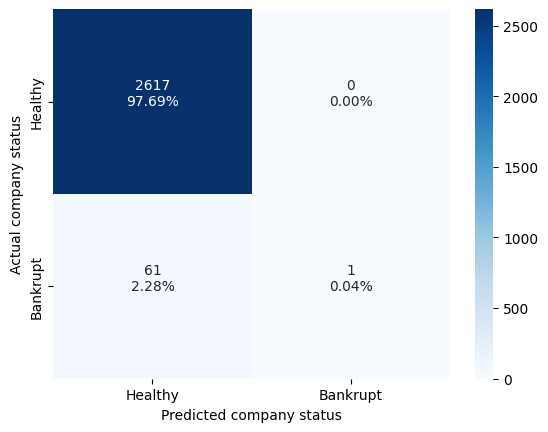

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier NB...
. Finished training in 0.0075 seconds.
Train Metrics for NB (Fold 2):
TP: 46
TN: 7409
FP: 442
FN: 140
Accuracy: 0.93
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
ROC-AUC: 0.82
Test Metrics for NB (Fold 2):
TP: 16
TN: 2476
FP: 141
FN: 46
Accuracy: 0.93
Precision: 0.98
Recall: 0.95
F1 Score: 0.96
ROC-AUC: 0.84


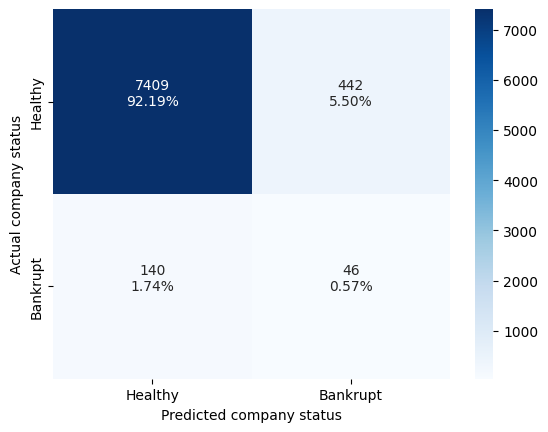

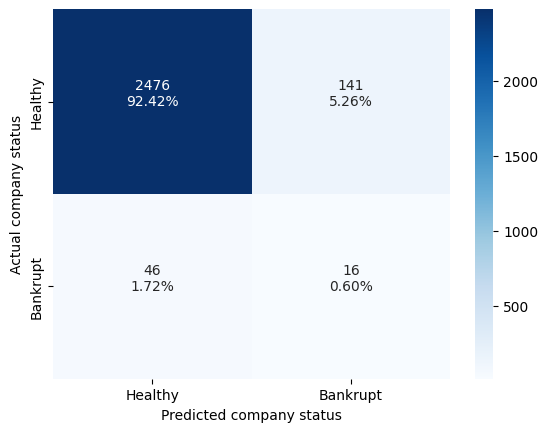

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


. Finished training in 11.0345 seconds.
Train Metrics for MLP (Fold 2):
TP: 1
TN: 7851
FP: 0
FN: 185
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.91
Test Metrics for MLP (Fold 2):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.85


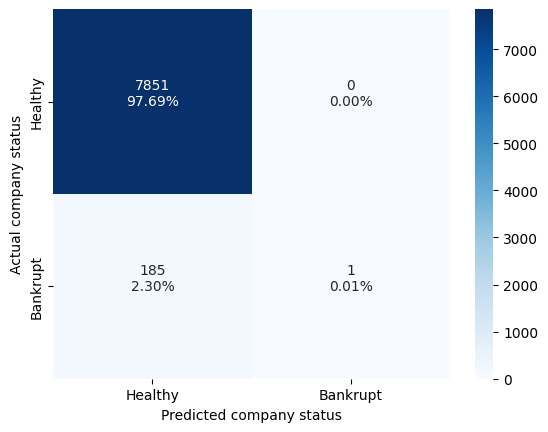

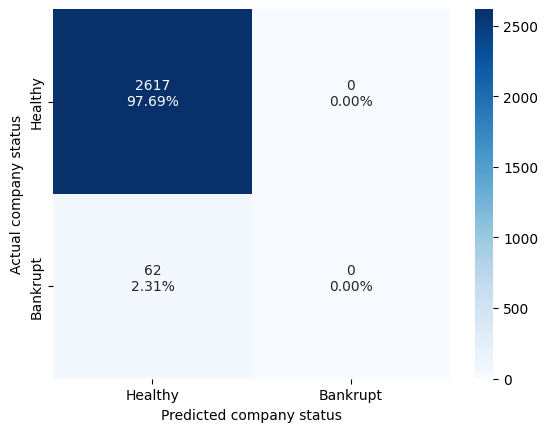

. Finished saving confusion matrices.
. Finished appending results to csv_data.
Currently in fold 3...
. Working with classifier SVM...
. Finished training in 2.3723 seconds.
Train Metrics for SVM (Fold 3):
TP: 0
TN: 7851
FP: 0
FN: 186
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.94
Test Metrics for SVM (Fold 3):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.67


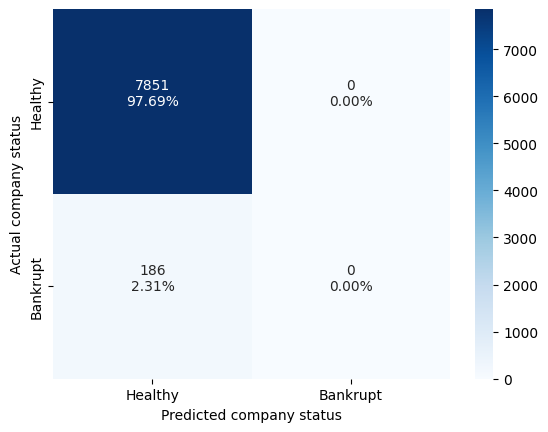

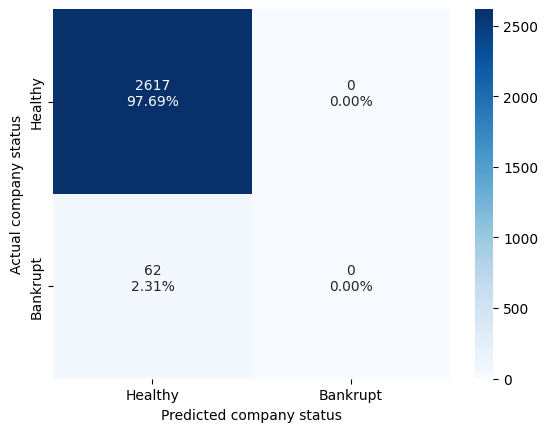

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier Ctree...
. Finished training in 0.1284 seconds.
Train Metrics for Ctree (Fold 3):
TP: 186
TN: 7851
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for Ctree (Fold 3):
TP: 9
TN: 2558
FP: 59
FN: 53
Accuracy: 0.96
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC-AUC: 0.56


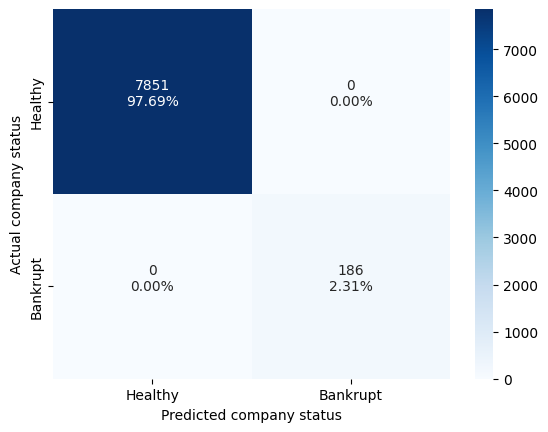

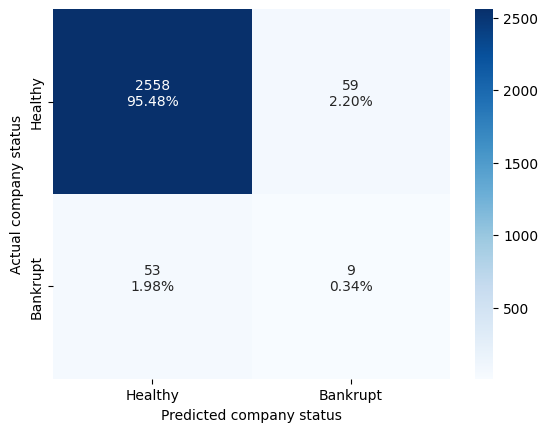

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier LDA...
. Finished training in 0.0578 seconds.
Train Metrics for LDA (Fold 3):
TP: 15
TN: 7761
FP: 90
FN: 171
Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.85
Test Metrics for LDA (Fold 3):
TP: 3
TN: 2579
FP: 38
FN: 59
Accuracy: 0.96
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.8


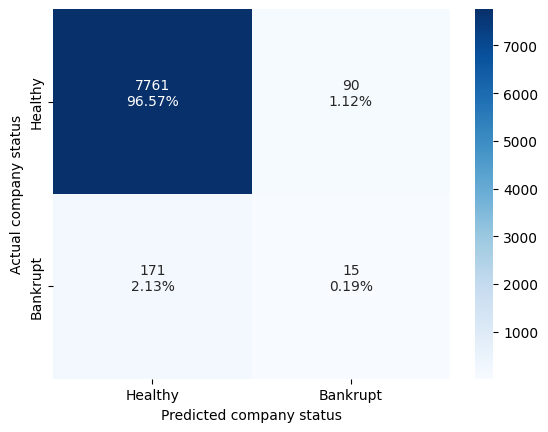

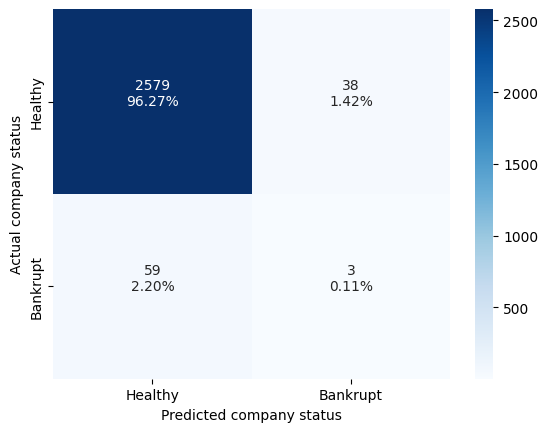

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier LR...
. Finished training in 0.0669 seconds.
Train Metrics for LR (Fold 3):
TP: 1
TN: 7846
FP: 5
FN: 185
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.85
Test Metrics for LR (Fold 3):
TP: 0
TN: 2614
FP: 3
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.8


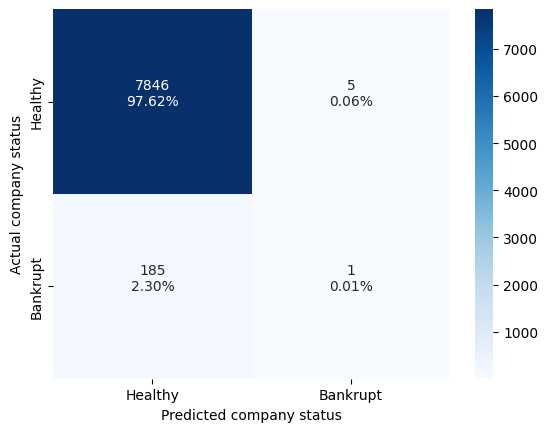

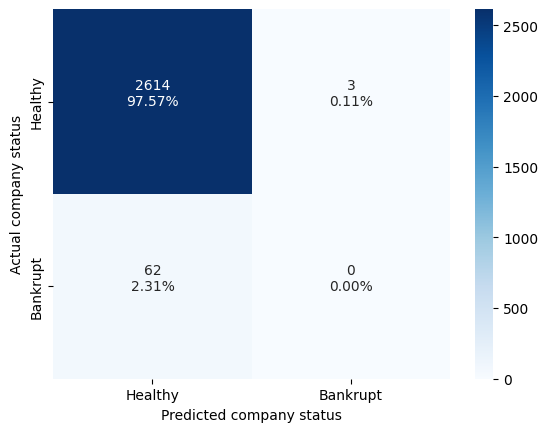

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier RF...
. Finished training in 1.5981 seconds.
Train Metrics for RF (Fold 3):
TP: 186
TN: 7851
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for RF (Fold 3):
TP: 1
TN: 2616
FP: 1
FN: 61
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.77


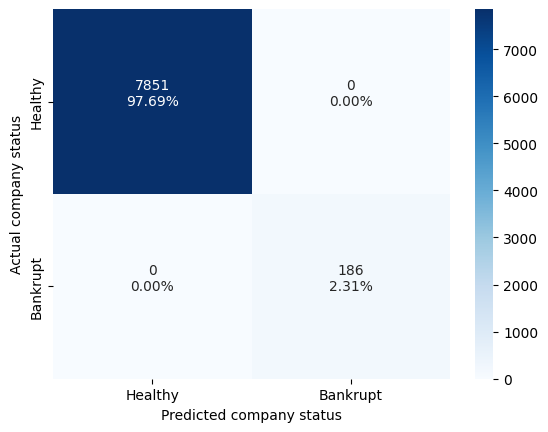

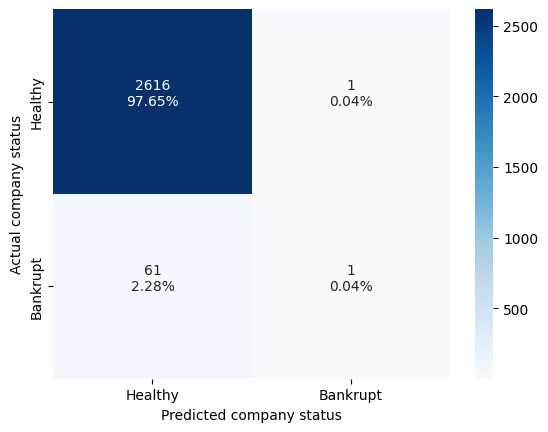

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier GB...
. Finished training in 3.1500 seconds.
Train Metrics for GB (Fold 3):
TP: 50
TN: 7851
FP: 0
FN: 136
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.97
Test Metrics for GB (Fold 3):
TP: 2
TN: 2607
FP: 10
FN: 60
Accuracy: 0.97
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.79


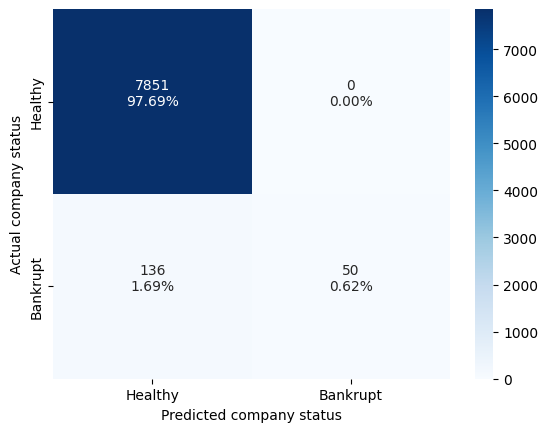

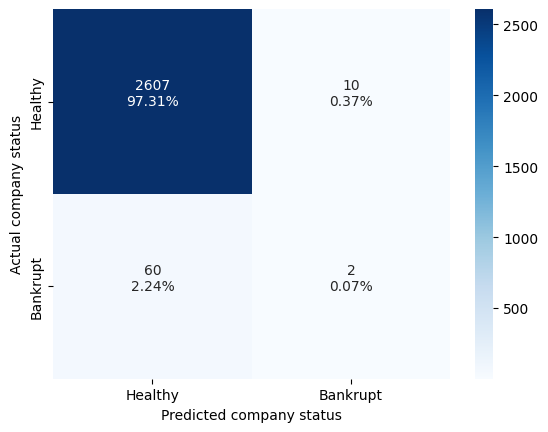

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier kNN...
. Finished training in 0.0271 seconds.
Train Metrics for kNN (Fold 3):
TP: 19
TN: 7848
FP: 3
FN: 167
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.97
Test Metrics for kNN (Fold 3):
TP: 3
TN: 2607
FP: 10
FN: 59
Accuracy: 0.97
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.61


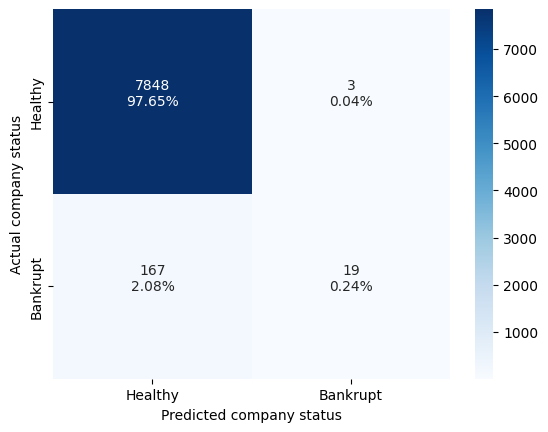

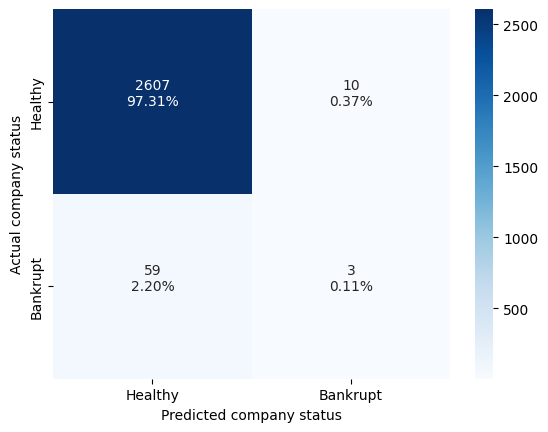

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier NB...
. Finished training in 0.0078 seconds.
Train Metrics for NB (Fold 3):
TP: 50
TN: 7397
FP: 454
FN: 136
Accuracy: 0.93
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
ROC-AUC: 0.84
Test Metrics for NB (Fold 3):
TP: 14
TN: 2441
FP: 176
FN: 48
Accuracy: 0.92
Precision: 0.98
Recall: 0.93
F1 Score: 0.96
ROC-AUC: 0.78


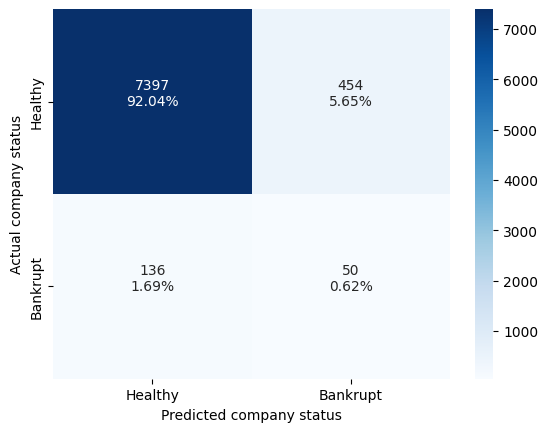

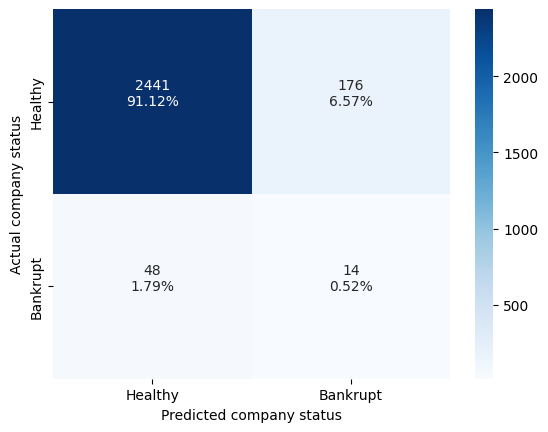

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


. Finished training in 10.2918 seconds.
Train Metrics for MLP (Fold 3):
TP: 6
TN: 7851
FP: 0
FN: 180
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.91
Test Metrics for MLP (Fold 3):
TP: 0
TN: 2615
FP: 2
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.81


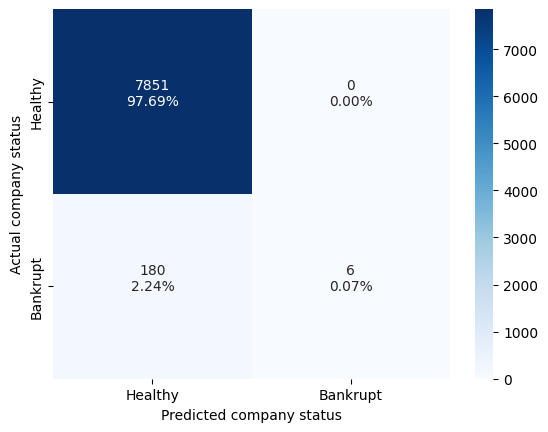

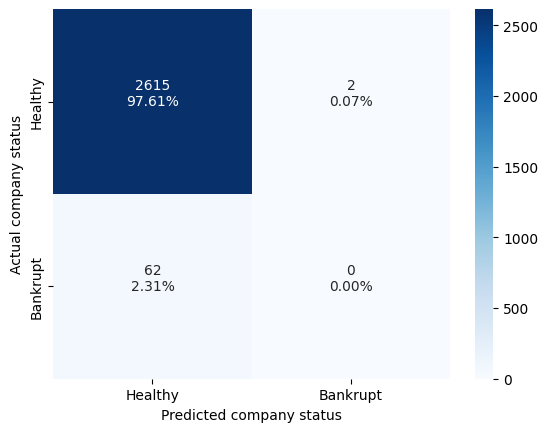

. Finished saving confusion matrices.
. Finished appending results to csv_data.
Currently in fold 4...
. Working with classifier SVM...
. Finished training in 2.7708 seconds.
Train Metrics for SVM (Fold 4):
TP: 0
TN: 7851
FP: 0
FN: 186
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.93
Test Metrics for SVM (Fold 4):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.77


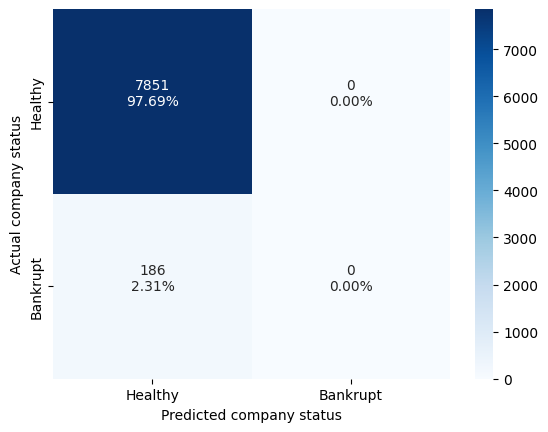

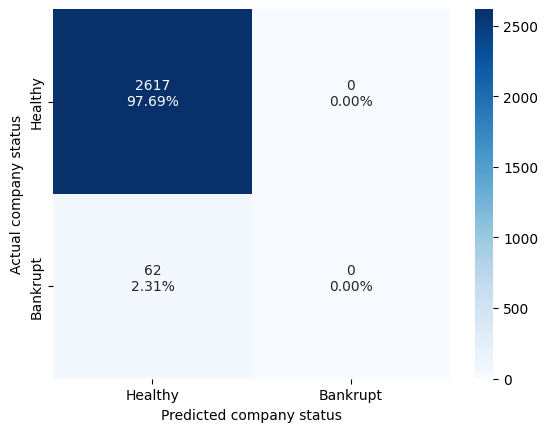

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier Ctree...
. Finished training in 0.1229 seconds.
Train Metrics for Ctree (Fold 4):
TP: 186
TN: 7851
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for Ctree (Fold 4):
TP: 8
TN: 2567
FP: 50
FN: 54
Accuracy: 0.96
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC-AUC: 0.55


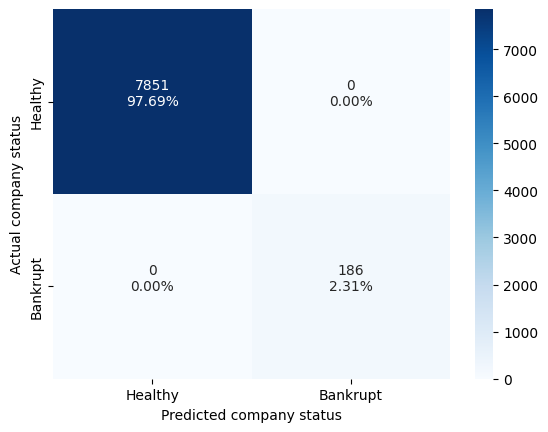

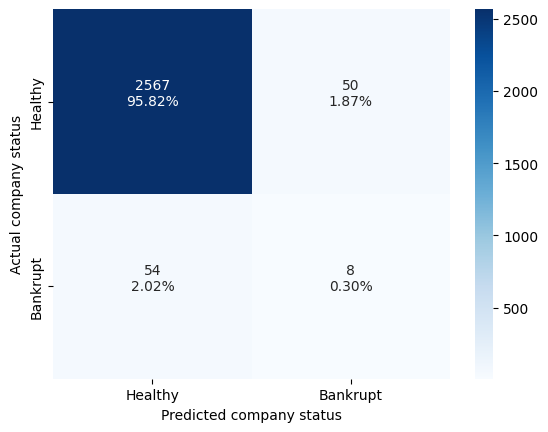

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier LDA...
. Finished training in 0.0148 seconds.
Train Metrics for LDA (Fold 4):
TP: 10
TN: 7775
FP: 76
FN: 176
Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.84
Test Metrics for LDA (Fold 4):
TP: 4
TN: 2606
FP: 11
FN: 58
Accuracy: 0.97
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.85


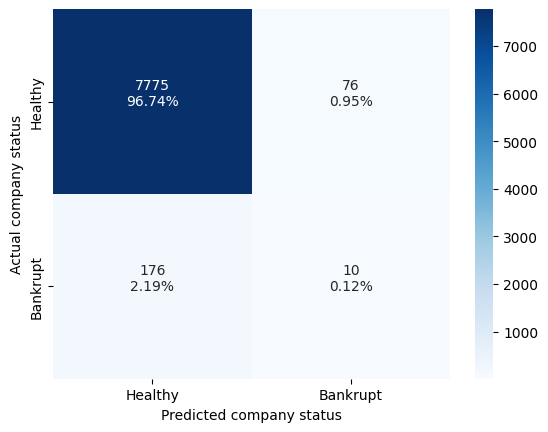

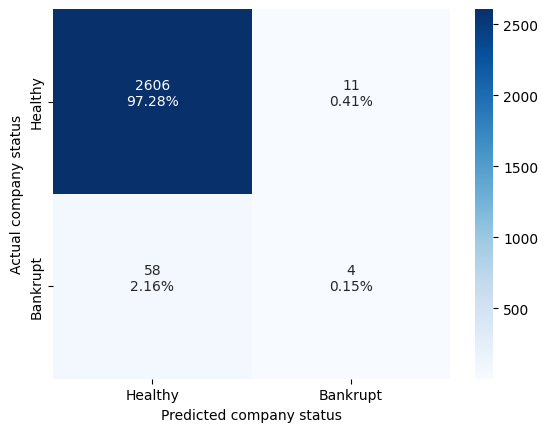

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier LR...
. Finished training in 0.0383 seconds.
Train Metrics for LR (Fold 4):
TP: 1
TN: 7851
FP: 0
FN: 185
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.83
Test Metrics for LR (Fold 4):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.84


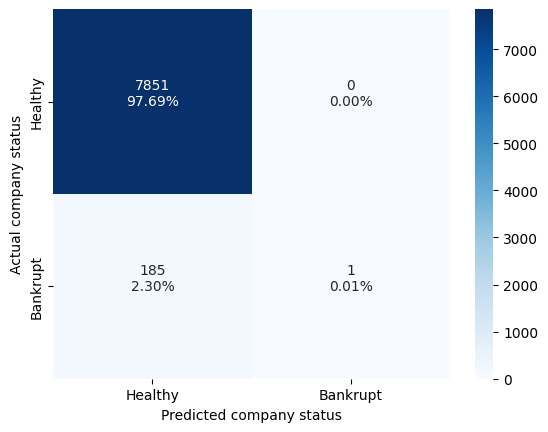

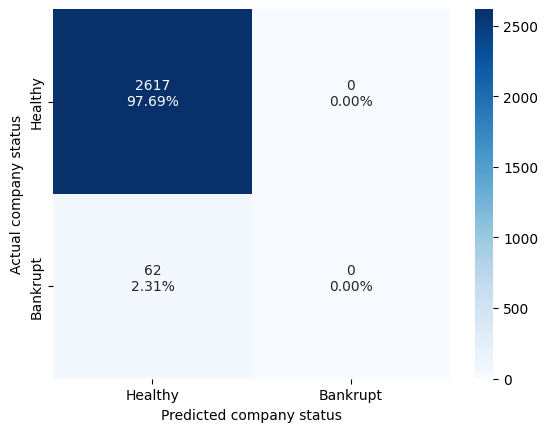

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier RF...
. Finished training in 1.5682 seconds.
Train Metrics for RF (Fold 4):
TP: 186
TN: 7851
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for RF (Fold 4):
TP: 1
TN: 2617
FP: 0
FN: 61
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.86


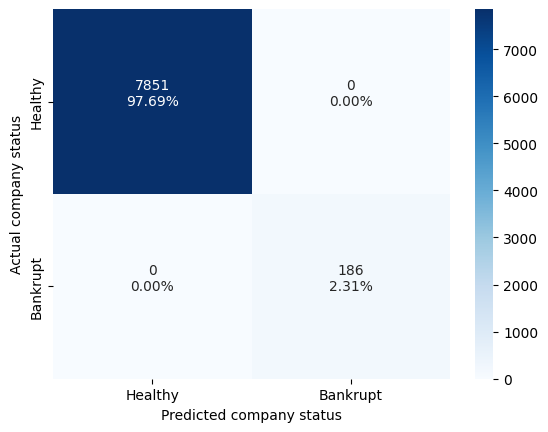

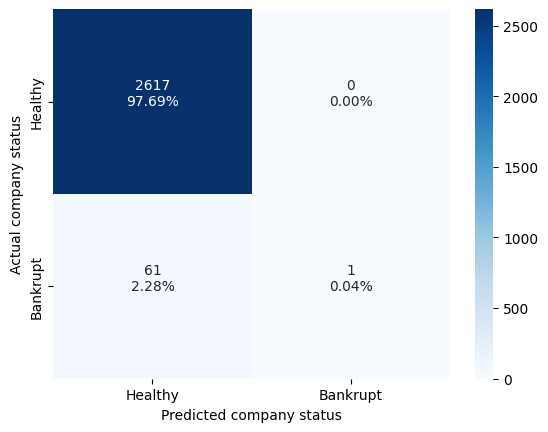

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier GB...
. Finished training in 3.9426 seconds.
Train Metrics for GB (Fold 4):
TP: 47
TN: 7851
FP: 0
FN: 139
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.96
Test Metrics for GB (Fold 4):
TP: 3
TN: 2616
FP: 1
FN: 59
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.87


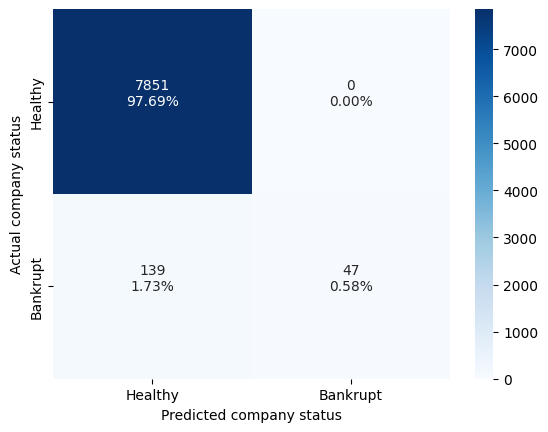

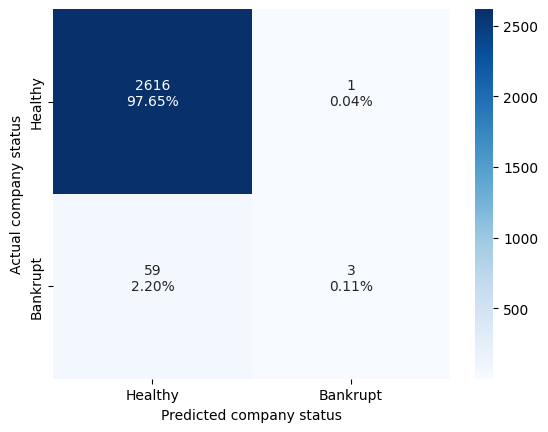

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier kNN...
. Finished training in 0.0308 seconds.
Train Metrics for kNN (Fold 4):
TP: 22
TN: 7847
FP: 4
FN: 164
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.97
Test Metrics for kNN (Fold 4):
TP: 2
TN: 2616
FP: 1
FN: 60
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.63


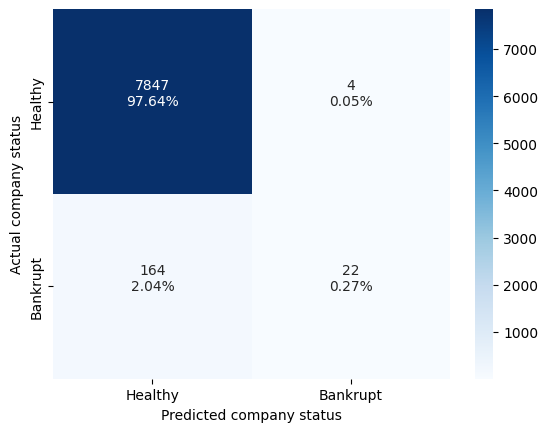

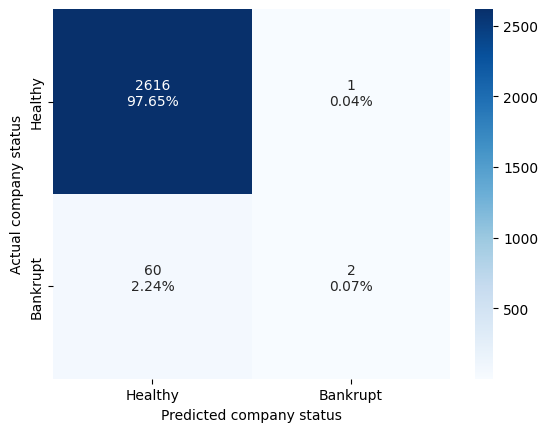

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier NB...
. Finished training in 0.0063 seconds.
Train Metrics for NB (Fold 4):
TP: 47
TN: 7408
FP: 443
FN: 139
Accuracy: 0.93
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
ROC-AUC: 0.82
Test Metrics for NB (Fold 4):
TP: 14
TN: 2468
FP: 149
FN: 48
Accuracy: 0.93
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
ROC-AUC: 0.84


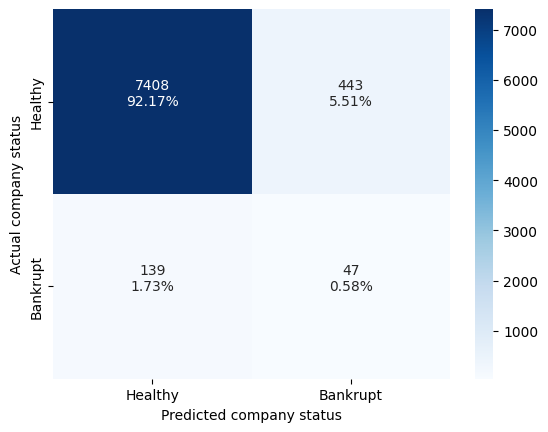

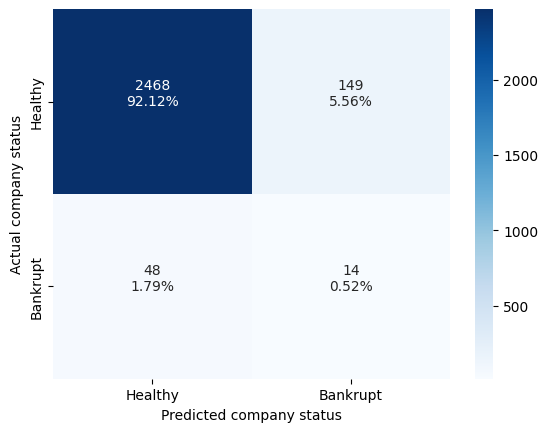

. Finished saving confusion matrices.
. Finished appending results to csv_data.
. Working with classifier MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


. Finished training in 7.9271 seconds.
Train Metrics for MLP (Fold 4):
TP: 6
TN: 7851
FP: 0
FN: 180
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.91
Test Metrics for MLP (Fold 4):
TP: 0
TN: 2617
FP: 0
FN: 62
Accuracy: 0.98
Precision: 0.98
Recall: 1.0
F1 Score: 0.99
ROC-AUC: 0.87


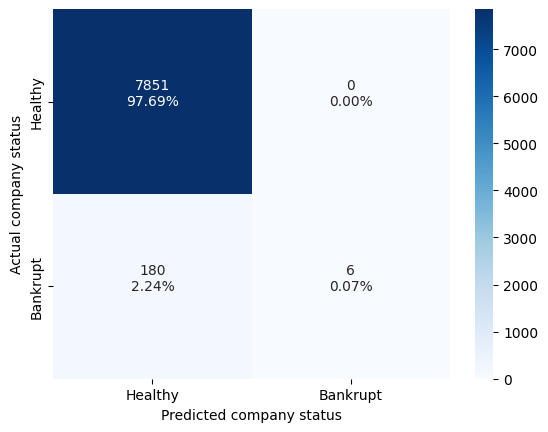

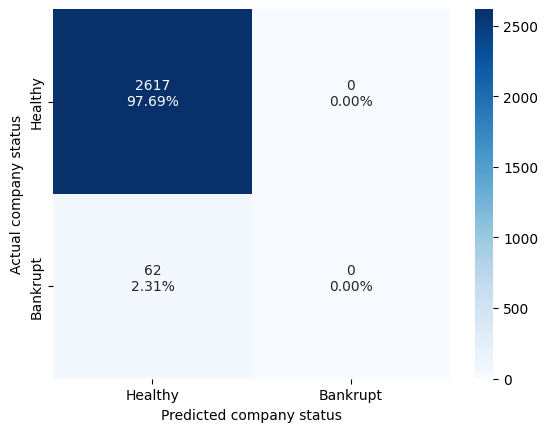

. Finished saving confusion matrices.
. Finished appending results to csv_data.
Results saved to classification_results.csv


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Λίστα για αποθήκευση δεδομένων
csv_data = []

# Διαδρομή για αποθήκευση εικόνων
figure_folder_path = "figures"
os.makedirs(figure_folder_path, exist_ok=True)

# Συνάρτηση για Confusion Matrix με "φανταχτερά" plots
def funcy_cf_plot(cf_matrix, class_names, fullMatrixName, directoryToSave):
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted company status')
    ax.set_ylabel('Actual company status')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

    figure_path = os.path.join(directoryToSave, fullMatrixName + ".png")
    plt.savefig(figure_path)
    plt.show()

# Συνάρτηση για εκπαίδευση και αξιολόγηση μοντέλων
def one_model_sim_function(modelName, clf, inputData, outputData, train_index, test_index, figure_folder_path, balancingRatio):
    print(f'. Working with classifier {modelName}...')

    # Εκπαίδευση μοντέλου
    start_time = time.time()
    clf.fit(inputData[train_index, :], outputData[train_index])
    training_time = time.time() - start_time
    print(f'. Finished training in {training_time:.4f} seconds.')

    # Πρόβλεψη στο training set
    start_time = time.time()
    predicted_train = clf.predict(inputData[train_index, :])
    train_pred_time = time.time() - start_time

    # Πρόβλεψη στο test set
    start_time = time.time()
    predicted_test = clf.predict(inputData[test_index, :])
    test_pred_time = time.time() - start_time

    # Probabilities for AUC-ROC
    y_train_proba = clf.predict_proba(inputData[train_index])[:, 1] if hasattr(clf, "predict_proba") else None
    y_test_proba = clf.predict_proba(inputData[test_index])[:, 1] if hasattr(clf, "predict_proba") else None

    # Calculate metrics for train set
    train_metrics = calculate_metrics(outputData[train_index], predicted_train, y_train_proba)
    print(f"Train Metrics for {modelName} (Fold {foldCounter}):")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")

    # Calculate metrics for test set
    test_metrics = calculate_metrics(outputData[test_index], predicted_test, y_test_proba)
    print(f"Test Metrics for {modelName} (Fold {foldCounter}):")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")



    # Confusion Matrices
    cf_matrix_train = confusion_matrix(outputData[train_index], predicted_train)
    cf_matrix_test = confusion_matrix(outputData[test_index], predicted_test)

    # Αποθήκευση Confusion Matrices ως εικόνες
    funcy_cf_plot(cf_matrix_train, ['Healthy', 'Bankrupt'], f"{modelName}_Fold{foldCounter}_Train_{balancingRatio}", figure_folder_path)
    funcy_cf_plot(cf_matrix_test, ['Healthy', 'Bankrupt'], f"{modelName}_Fold{foldCounter}_Test_{balancingRatio}", figure_folder_path)

    print('. Finished saving confusion matrices.')


    # Αποθήκευση αποτελεσμάτων στο csv_data
    csv_data.append([
        modelName, "Train", "Balanced",
        len(train_index), sum(outputData[train_index] == 2),
        cf_matrix_train[1, 1], cf_matrix_train[0, 1], cf_matrix_train[0, 0], cf_matrix_train[1, 0],
        train_metrics["ROC-AUC"]
    ])
    csv_data.append([
        modelName, "Test", "Balanced",
        len(test_index), sum(outputData[test_index] == 2),
        cf_matrix_test[1, 1], cf_matrix_test[0, 1], cf_matrix_test[0, 0], cf_matrix_test[1, 0],
        test_metrics["ROC-AUC"]
    ])

    print('. Finished appending results to csv_data.')

# Δημιουργία Stratified K-Fold
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Ορισμός των χαρακτηριστικών (inputData) και της κλάσης (outputData)
inputData = dataset.drop(columns=['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).values  # Τα χαρακτηριστικά
outputData = dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'].values  # Η κλάση στόχος
foldCounter = 1

for train_index, test_index in stratified_kfold.split(inputData, outputData):
    print(f'Currently in fold {foldCounter}...')

    # Εκπαίδευση και αξιολόγηση για κάθε μοντέλο
    one_model_sim_function("SVM", SVC(probability=True), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")
    one_model_sim_function("Ctree", DecisionTreeClassifier(), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")
    one_model_sim_function("LDA", LinearDiscriminantAnalysis(), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")
    one_model_sim_function("LR", LogisticRegression(), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")
    one_model_sim_function("RF", RandomForestClassifier(), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")
    one_model_sim_function("GB", GradientBoostingClassifier(), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")
    one_model_sim_function("kNN", KNeighborsClassifier(), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")
    one_model_sim_function("NB", GaussianNB(), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")
    one_model_sim_function("MLP", MLPClassifier(), inputData, outputData, train_index, test_index, figure_folder_path, "unbalanced")

    foldCounter += 1

# Αποθήκευση των αποτελεσμάτων σε CSV
results_df = pd.DataFrame(csv_data, columns=[
    "Model", "Set", "Balanced or unbalanced train set ", "Number of training samples", "Bankrupt companies in training",
    "TP", "FP", "TN", "FN", "ROC-AUC"

])
results_df.to_csv("balancedDataOutcomes.csv", index=False)
print("Results saved to balancedDataOutcomes.csv")


In [9]:
# Βοηθητική συναρτηση ν2 "Δημιουργία ωραίου Confusion Matrix ως Εικόνα"

def funcy_cf_plot(cf_matrix, class_names, fullMatrixName, directoryToSave):
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted company status')
    ax.set_ylabel('Actual company status')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

    figure_path = os.path.join(directoryToSave, fullMatrixName + ".png")
    plt.savefig(figure_path)
    plt.show()

In [12]:
#Βοηθητική συνάρτηση ν3 για εκπαίδευση και αξιολόγηση μοντέλων
import time

def one_model_sim_function(modelName, clf, inputData, outputData, train_index, test_index, figure_folder_path, balancingRatio):
    print(f'. Working with classifier {modelName}...')

    # Εκπαίδευση μοντέλου
    start_time = time.time()
    clf.fit(inputData[train_index, :], outputData[train_index])
    training_time = time.time() - start_time
    print(f'. Finished training in {training_time:.4f} seconds.')

    # Πρόβλεψη στο training set
    start_time = time.time()
    predicted_train = clf.predict(inputData[train_index, :])
    train_pred_time = time.time() - start_time

    # Πρόβλεψη στο test set
    start_time = time.time()
    predicted_test = clf.predict(inputData[test_index, :])
    test_pred_time = time.time() - start_time

    # Confusion Matrices
    cf_matrix_train = confusion_matrix(outputData[train_index], predicted_train)
    cf_matrix_test = confusion_matrix(outputData[test_index], predicted_test)

    # Αποθήκευση Confusion Matrices ως εικόνες
    funcy_cf_plot(cf_matrix_train, ['Healthy', 'Bankrupt'], f"{modelName}_Fold{foldCounter}_Train_{balancingRatio}", figure_folder_path)
    funcy_cf_plot(cf_matrix_test, ['Healthy', 'Bankrupt'], f"{modelName}_Fold{foldCounter}_Test_{balancingRatio}", figure_folder_path)

    print('. Finished saving confusion matrices.')


    # Αποθήκευση αποτελεσμάτων στο csv_data
    csv_data.append([
        modelName, fold, "Train", balancingRatio,
        sum(outputData[train_index] == 1), sum(outputData[train_index] == 2),
        cf_matrix_train[1, 1], cf_matrix_train[0, 1], cf_matrix_train[0, 0], cf_matrix_train[1, 0],
        training_time, train_pred_time
    ])
    csv_data.append([
        modelName, fold, "Test", balancingRatio,
        sum(outputData[test_index] == 1), sum(outputData[test_index] == 2),
        cf_matrix_test[1, 1], cf_matrix_test[0, 1], cf_matrix_test[0, 0], cf_matrix_test[1, 0],
        training_time, test_pred_time
    ])

    print('. Finished appending results to csv_data.')

#

In [ ]:
# Αποθήκευση δεδομένων στο drive
csv_filename = "balancedDataOutcomes.csv"
csv_path = os.path.join(drive_path, csv_filename)

with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)